<a href="https://colab.research.google.com/github/TosinJayeola/faults/blob/master/Plot_trace_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install segyio

## Plotting section

The straightforward way to display a segy file from segyio format is to use matplotlib.pyplot.imshow, which treats 2D arrays as images.

In order to scale and standardize the display, it is useful to get the nth percentile of the amplitudes

Let's get to plotting!

Notice that we have to transpose the array to plot it like this. The reason is that we're storing things with traces in the first dimension ('rows' if you like), for convenience. This way data[0] refers to the first trace, not the first time sample. But imshow assumes that we're looking at a sort of image, with rows going across the image.

The extent of the image is also populated from the number of trace to display and the samples two-way times

In [21]:
import segyio
import numpy as np
import sys
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_sgy(files):
    res = []
    for i in files:
        if i.endswith('.sgy'):
            res.append(i)
    return res

def Plot(filepath):
  #Open the file with segy
  files = get_sgy(os.listdir(filepath))
  #print(files)
  for file in files:
    with segyio.open(os.path.join(filepath, file), 'r', strict=False, ignore_geometry=True) as f:
          # Get basic attributes
          #print (file)
          n_traces = f.tracecount
          sample_rate = segyio.tools.dt(f) / 1000
          n_samples = f.samples.size
          twt = f.samples
          data = f.trace.raw[:]  # Get all data into memory (could cause on big files)

  
    #In order to scale and standardize the display, it is useful to get the nth percentile of the amplitudes
          clip_percentile=99
          vm = np.percentile(data, clip_percentile)

          fig = plt.figure(figsize=(18, 8))
          ax = fig.add_subplot(1, 1, 1)
          extent = [1, n_traces, twt[-1], twt[0]]  # define extent
          ax.imshow(data.T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
          ax.set_xlabel('CDP number')
          ax.set_ylabel('TWT [ms]')
          ax.set_title(f'{file}')


  print("we are done here Nid") 




So the input to the plot function will be the filepath to the folder holding the data

we are done here Nid


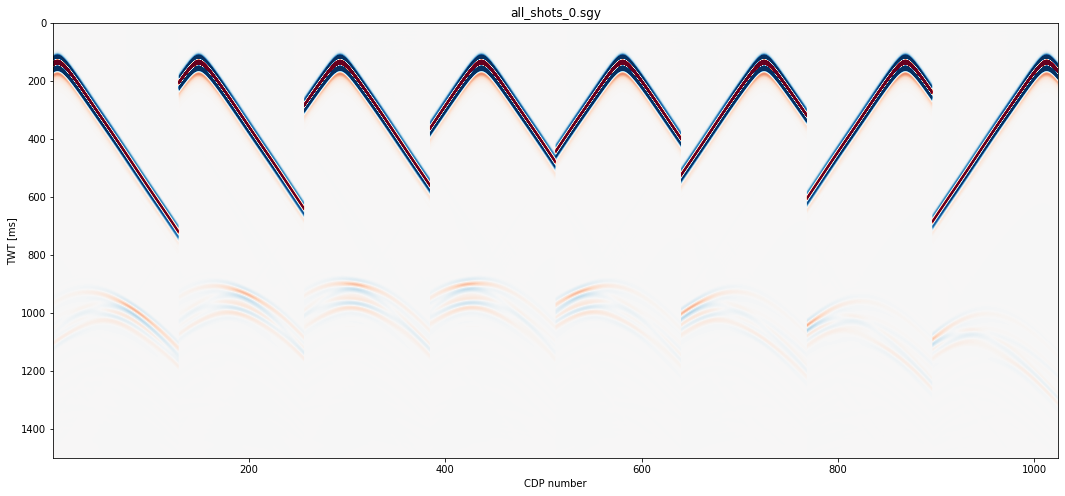

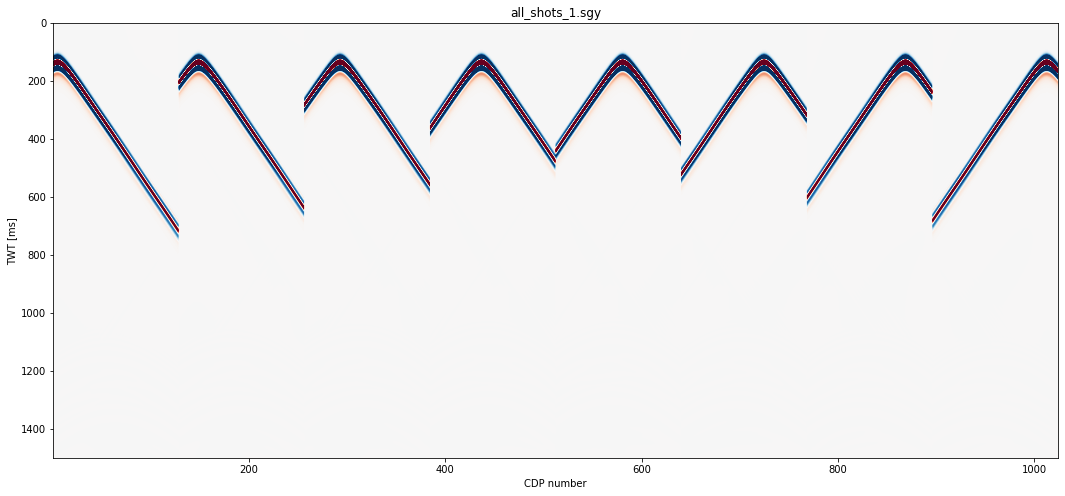

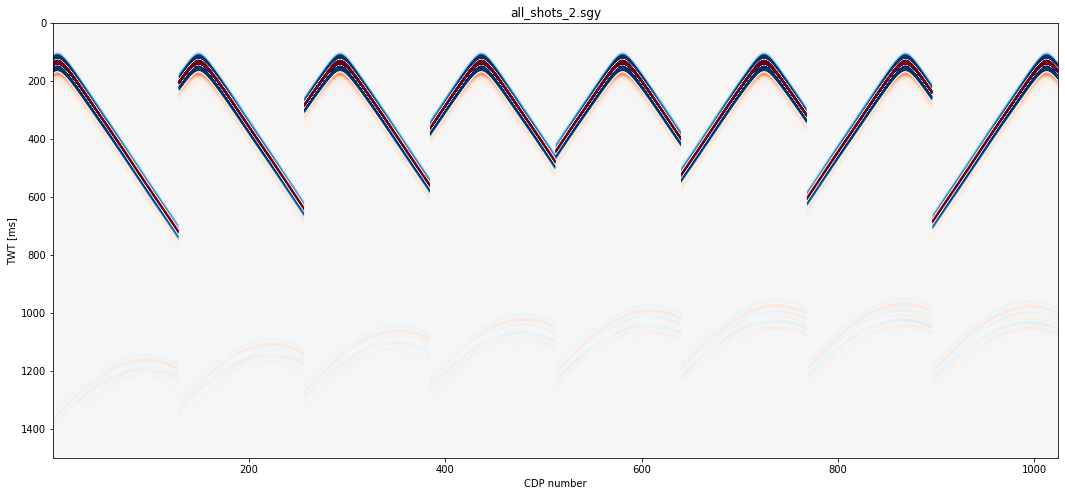

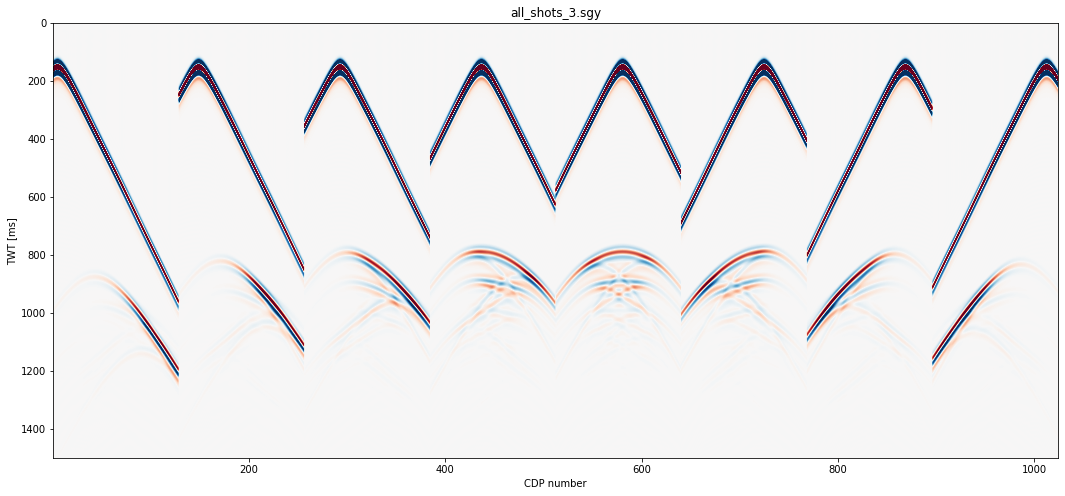

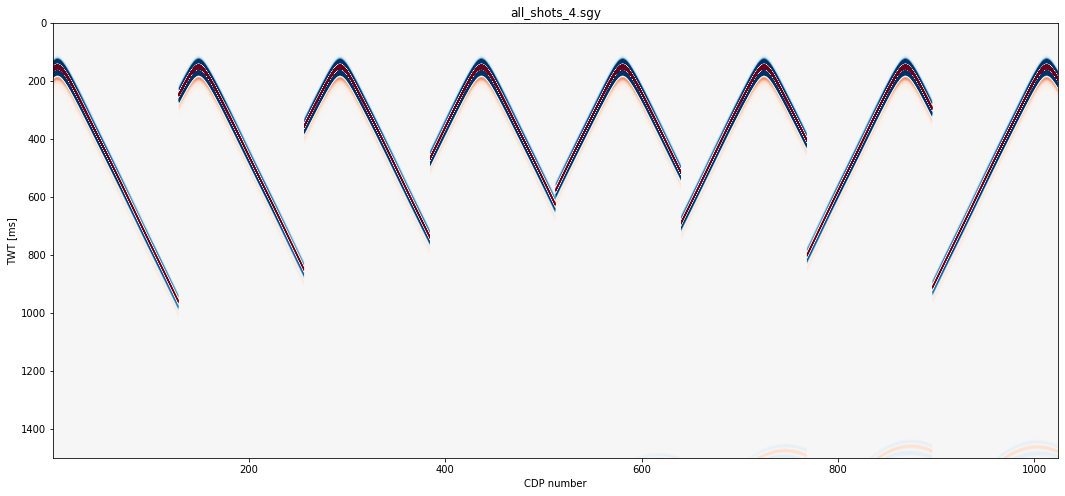

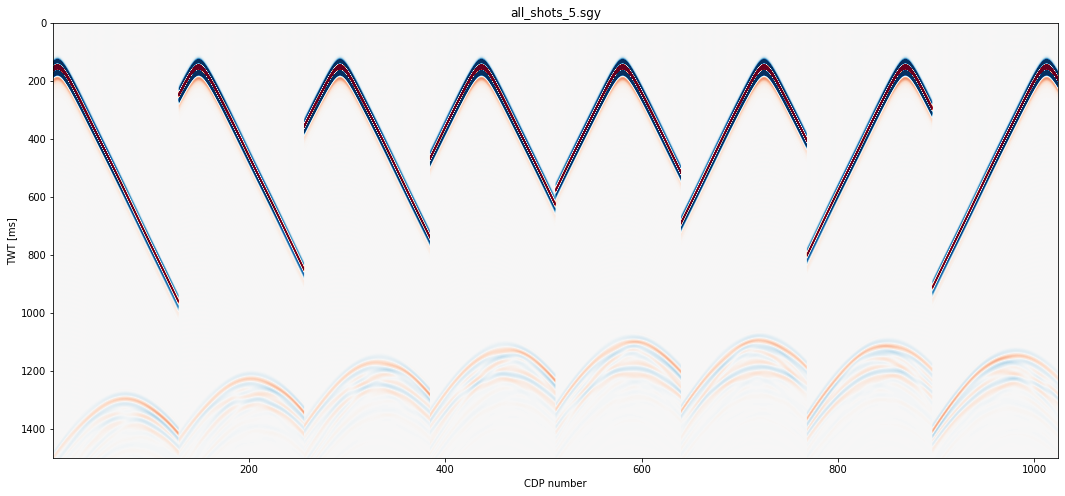

In [24]:
Model="/content/drive/My Drive/geometric shape model 2/models"

Plot(Model)

we are done here Nid


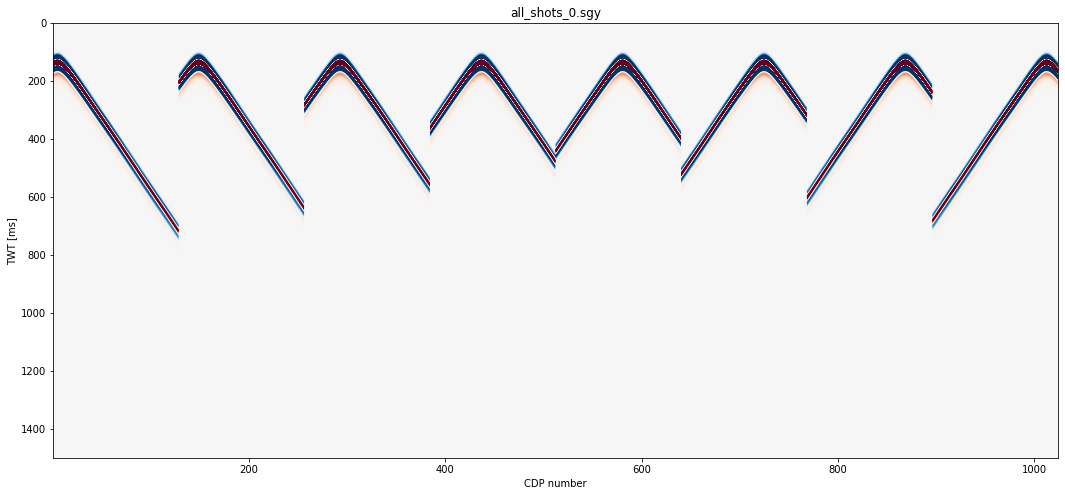

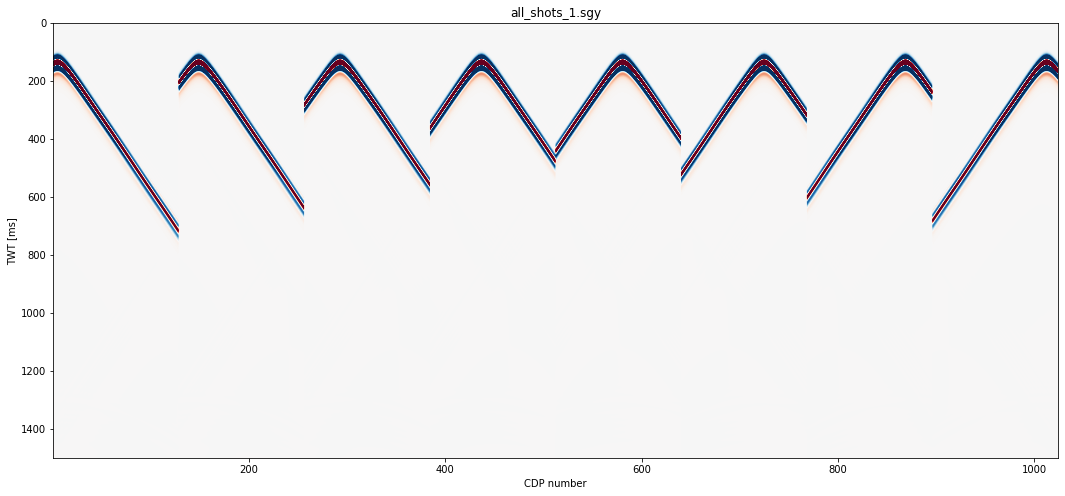

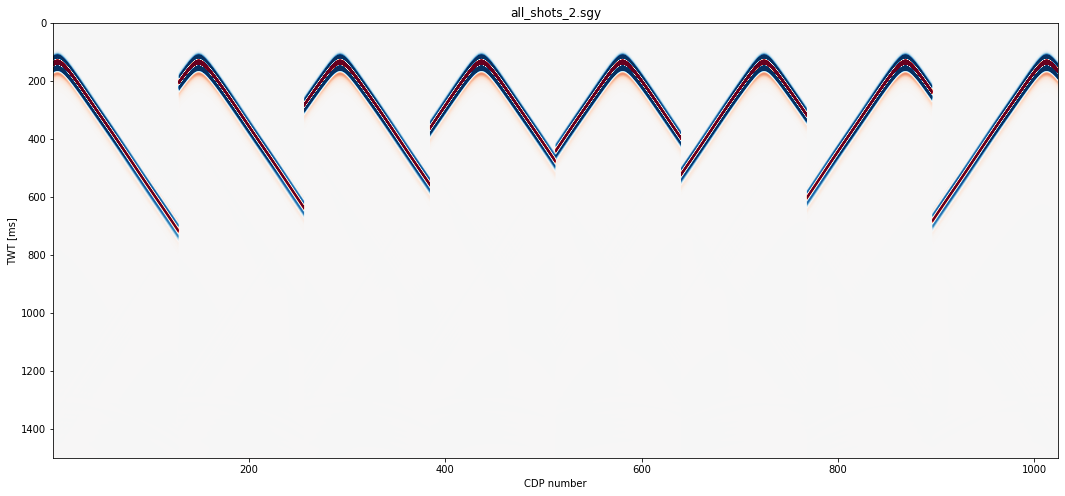

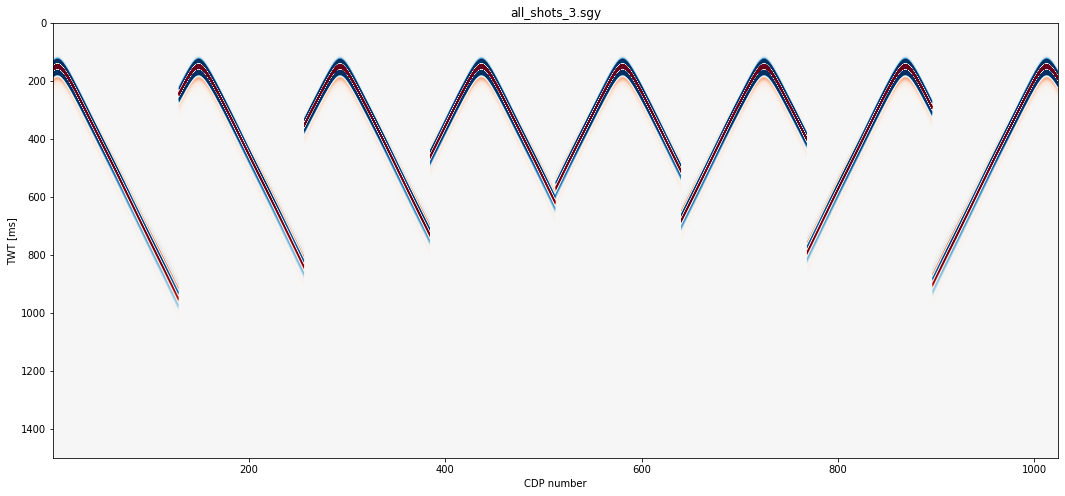

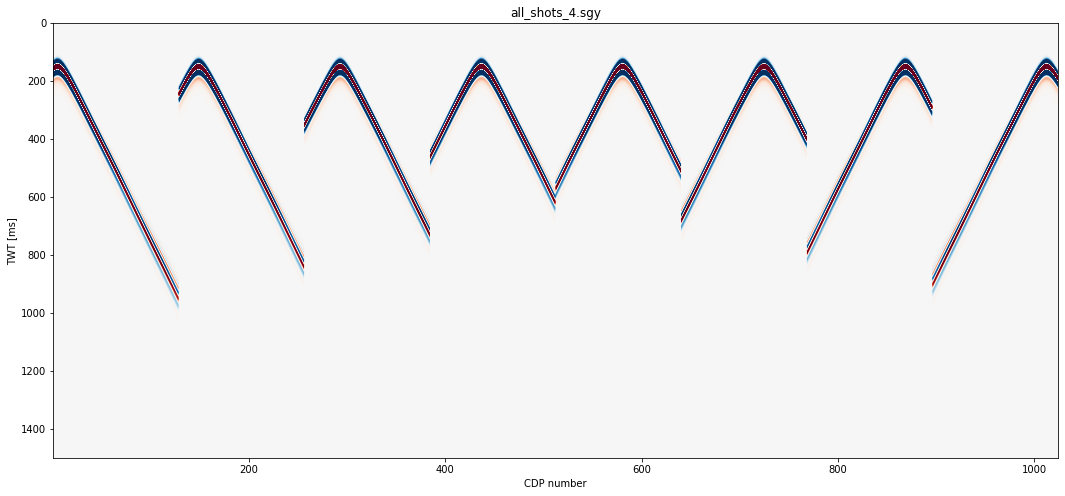

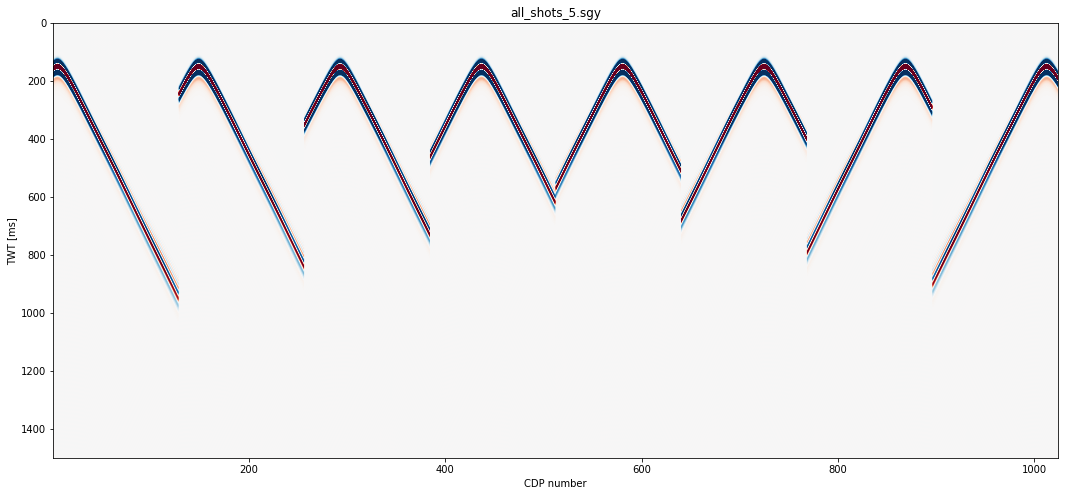

In [23]:
Baseline="/content/drive/My Drive/geometric shape model 2/baseline"

Plot(Baseline)